#### Задание 1
Монетку подбрасывают 15 раз, найдите вероятность выпадения простого числа орлов (решение на бумажке и на python).

In [13]:
import math
import numpy as np
from scipy.stats import binom
import seaborn as sb


По задаче понятно, что мы говорим о биномиальном распеределении.

Формула биномиального распределения

$ P(\xi=k)=(\frac{n}{k})*p^k*(1-p)^{n-k} $

В нашем примере (возьмем все протые числa до 15 = 2,3,5,7,11,13):
- n=15
- k=3
- p=0,5

Решение. Подставляем значения в формулу.

In [24]:
# Предварительно сформируем треугольник Паскаля
def combination(n, r): # correct calculation of combinations, n choose k
    return int((math.factorial(n)) / ((math.factorial(r)) * math.factorial(n - r)))
def binom_P(k,p,n):
    return combination(n, k) * p**k * (1-p)**(n-k)


In [25]:
for k in [2,3,5,7,11,13]:
    print('P({})={}'.format(k,binom_P(k,0.5,15)))


P(2)=0.003204345703125
P(3)=0.013885498046875
P(5)=0.091644287109375
P(7)=0.196380615234375
P(11)=0.041656494140625
P(13)=0.003204345703125


Посчитаем вероятность при помощи готовой библиотеки scipy.stats.binom.

In [28]:
for k in [2,3,5,7,11,13]:
    print('P({})={}'.format(k,binom.pmf( k=k,  n=15,  p=0.5)))


P(2)=0.0032043457031250204
P(3)=0.013885498046875066
P(5)=0.09164428710937506
P(7)=0.1963806152343757
P(11)=0.04165649414062508
P(13)=0.0032043457031250204


#### Задание 2
Создайте свою дискретную случайную величину с не менее, чем 10 значениями. Просемплируйте 1000 случайных значений, постройте гистограмму плотности распределения по выборке, посчитайте среднее, дисперсию и медиану.

Предположим, у нас 11 экспериментов в каждом повторе, с благоприятным исходом 0,6.
Тогда биномиальная случайная величина задается при помощи пайтона следующим образом.
И сразу сделаем 1000 повторений. 

In [6]:
data_binom = binom.rvs(n=11,p=0.8,size=1000)

#### Отразим получившиеся результаты. Покажим гистограмму плотности распределения по выборке

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial')]

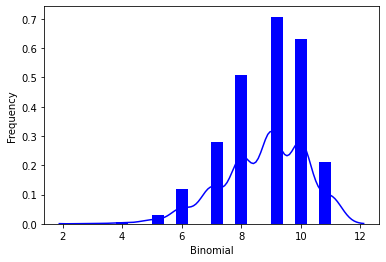

In [16]:
ax = sb.distplot(data_binom,
                  kde=True,
                  color='blue',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Binomial', ylabel='Frequency')

#### Находим среднее, дисперсию и медиану.

In [24]:
m,v = binom.stats(11, 0.8, moments='mv')
print('Mean={}, variance={},median={}'.format(m,v,np.median(data_binom)))

Mean=8.8, variance=1.7599999999999998,median=9.0 
